RAJ RAUNAK KUMAR 20HCS4148

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Dataset ko load karna
data = load_breast_cancer()  # Breast cancer dataset load karna
X = data.data  # Features
y = data.target  # Labels (target variable)

# Dataset ko training aur testing sets mein divide karna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70-30 split


In [2]:
# Logistic function define karna
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Sigmoid function ka formula

# Logistic regression ko train karna
def logistic_regression_ols(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape  # Data ke rows aur columns ka size
    X = np.c_[np.ones(m), X]  # Intercept term ke liye ones ka column
    beta = np.zeros(n + 1)  # Weights ko initialize karna
    train_accuracy = []  # Training accuracy ko store karna
    test_accuracy = []  # Testing accuracy ko store karna

    for i in range(iterations):
        z = np.dot(X, beta)  # Linear combination
        predictions = sigmoid(z)  # Sigmoid se probabilities
        error = predictions - y  # Error ko calculate karna
        gradient = np.dot(X.T, error) / m  # Gradient descent ka step
        beta -= learning_rate * gradient  # Weights ko update karna

        # Training accuracy ko calculate karna
        train_predictions = (sigmoid(np.dot(X, beta)) >= 0.5).astype(int)
        train_accuracy.append(np.mean(train_predictions == y))

        # Testing accuracy ko calculate karna
        X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
        test_predictions = (sigmoid(np.dot(X_test_intercept, beta)) >= 0.5).astype(int)
        test_accuracy.append(np.mean(test_predictions == y_test))

    return beta, train_accuracy, test_accuracy


In [3]:
# Logistic regression model ko train karna
beta, train_accuracy, test_accuracy = logistic_regression_ols(X_train, y_train, learning_rate=0.01, iterations=1000)

# Confusion matrix ko calculate karna
X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]  # Testing data mein intercept add karna
test_predictions = (sigmoid(np.dot(X_test_intercept, beta)) >= 0.5).astype(int)  # Predictions
conf_matrix = confusion_matrix(y_test, test_predictions)  # Confusion matrix ko calculate karna

print("Confusion Matrix:")  # Confusion matrix ko display karna
print(conf_matrix)

# Sensitivity aur specificity ko calculate karna
true_positives = conf_matrix[1, 1]  # Confusion matrix ka TP
false_negatives = conf_matrix[1, 0]  # Confusion matrix ka FN
false_positives = conf_matrix[0, 1]  # Confusion matrix ka FP
true_negatives = conf_matrix[0, 0]  # Confusion matrix ka TN

sensitivity = true_positives / (true_positives + false_negatives)  # Sensitivity
specificity = true_negatives / (true_negatives + false_positives)  # Specificity

print(f"Sensitivity: {sensitivity:.2f}")  # Sensitivity ko display karna
print(f"Specificity: {specificity:.2f}")  # Specificity ko display karna


<ipython-input-2-f32262eef16d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Sigmoid function ka formula


Confusion Matrix:
[[61  2]
 [10 98]]
Sensitivity: 0.91
Specificity: 0.97


<ipython-input-2-f32262eef16d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))  # Sigmoid function ka formula


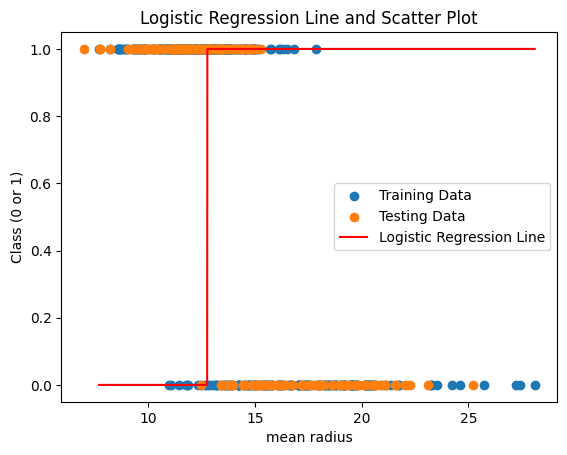

In [5]:
# Scatter plot aur logistic regression line
plt.scatter(X_train[:, 0], y_train, label="Training Data")  # Training data ka scatter plot
plt.scatter(X_test[:, 0], y_test, label="Testing Data")  # Testing data ka scatter plot
plt.plot(sorted(X_train[:, 0]), sorted(sigmoid(np.dot(np.c_[np.ones(X_train.shape[0]), X_train], beta))),
         color='red', label="Logistic Regression Line")  # Regression line ko plot karna
plt.xlabel(data.feature_names[0])  # X-axis ka label (pehli feature)
plt.ylabel("Class (0 or 1)")  # Y-axis ka label
plt.title("Logistic Regression Line and Scatter Plot")  # Plot ka title
plt.legend()  # Legend ko show karna
plt.show()  # Graph ko display karna


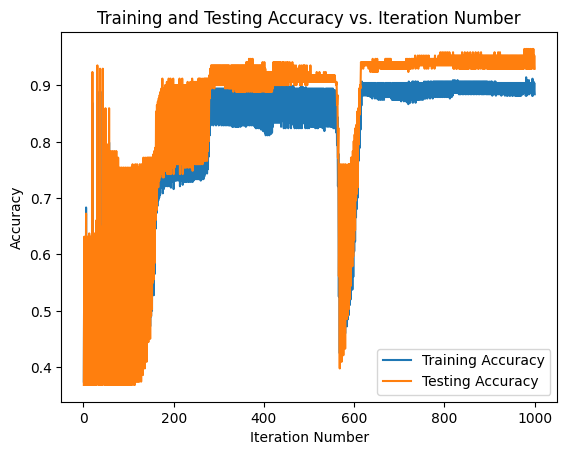

In [6]:
# Training aur testing accuracy ke plot ka graph
plt.plot(range(1, 1001), train_accuracy, label="Training Accuracy")  # Training accuracy ka plot
plt.plot(range(1, 1001), test_accuracy, label="Testing Accuracy")  # Testing accuracy ka plot
plt.xlabel("Iteration Number")  # X-axis ka label
plt.ylabel("Accuracy")  # Y-axis ka label
plt.title("Training and Testing Accuracy vs. Iteration Number")  # Plot ka title
plt.legend()  # Legend ko show karna
plt.show()  # Graph ko display karna
